## Cardiovascular Disease Prediction

In this Project  we’ll be learning Exploratory Data Analytics And Machine Learning Models with the help of a case study on "Cardiovascular Disease Prediction". This will enable us to understand why EDA & ML Models are  most important step in the process of Machine Learning.

#### Dataset
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)

• 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)




In [1]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
data=pd.read_csv("C:/Users/razsa/Downloads/data_cardiovascular_risk.csv")

In [4]:
data.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [8]:
print(data.education.unique())

[ 2.  4.  1.  3. nan]


In [9]:
print(data.sex.unique())

['F' 'M']


In [10]:
print(data.is_smoking.unique())

['YES' 'NO']


In [11]:
print(data.TenYearCHD.unique())

[1 0]


In [12]:
education = data.education.mode()[0]  

In [13]:
data.education.fillna(education,inplace = True)

In [14]:
data["group_age"]=pd.cut(data.age,[30,40,50,60,70],
                         labels=["31-40","41-50","51-60","61-70"])
data.group_age

0       61-70
1       31-40
2       41-50
3       41-50
4       61-70
        ...  
3385    51-60
3386    41-50
3387    41-50
3388    51-60
3389    51-60
Name: group_age, Length: 3390, dtype: category
Categories (4, object): ['31-40' < '41-50' < '51-60' < '61-70']

In [15]:
data['group_age'].unique()

['61-70', '31-40', '41-50', '51-60']
Categories (4, object): ['31-40' < '41-50' < '51-60' < '61-70']

In [16]:
data.loc[data.is_smoking == "NO", ['is_smoking','cigsPerDay']].isnull().sum()

is_smoking    0
cigsPerDay    0
dtype: int64

In [17]:
data1 = data.loc[data.is_smoking == "YES", ['is_smoking','cigsPerDay','group_age']]
data1

,is_smoking,cigsPerDay,group_age
0,YES,3.0,61-70
2,YES,10.0,41-50
3,YES,20.0,41-50
4,YES,30.0,61-70
7,YES,35.0,31-40
...,...,...,...
3377,YES,25.0,31-40
3378,YES,NaN,31-40
3379,YES,30.0,31-40
3380,YES,20.0,51-60


In [18]:
dict_age_mode = data1.groupby(['group_age'])['cigsPerDay'].agg(pd.Series.mode)
dict_age_mode

group_age
31-40    20.0
41-50    20.0
51-60    20.0
61-70    20.0
Name: cigsPerDay, dtype: float64

In [19]:
data2 = data1.loc[data.cigsPerDay.isnull(), ['is_smoking','cigsPerDay','group_age']]
data2

,is_smoking,cigsPerDay,group_age
422,YES,NaN,51-60
466,YES,NaN,41-50
469,YES,NaN,41-50
491,YES,NaN,61-70
538,YES,NaN,41-50
767,YES,NaN,51-60
1461,YES,NaN,41-50
1467,YES,NaN,41-50
1597,YES,NaN,51-60
1986,YES,NaN,41-50


In [20]:
def categorise(row):  
    if row['group_age'] == '31-40':
        return  dict_age_mode['31-40']
    elif row['group_age'] == '41-50':
        return dict_age_mode['41-50']
    elif row['group_age'] == '51-60':
        return dict_age_mode['51-60']
    elif row['group_age'] == '61-70':
        return dict_age_mode['61-70']

In [21]:
data['group_age_mean'] = data.apply(lambda row: categorise(row), axis=1)

In [22]:
data['cigsPerDay'].fillna(data['group_age_mean'],inplace = True)
data['cigsPerDay'].isnull().sum()

0

In [23]:
data.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
group_age            0
group_age_mean       0
dtype: int64

### I want to know who smokes more male or female ?


<AxesSubplot:xlabel='sex', ylabel='count'>

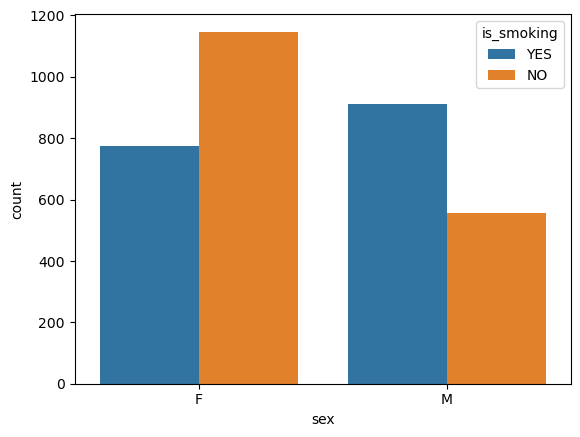

In [24]:
sn.countplot(x='sex',data = data,hue='is_smoking')


###### from above count plot i concluded that male smoke more as compared to female 

### I want to find that how many male and female aged below 18 smoke ?

In [25]:
p = (data['age'] <= 18)
print(p.sum())

0


#### so from above i conclude that there is no one below age 18 , who smokes .

In [26]:
max(data.cigsPerDay)

70.0

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

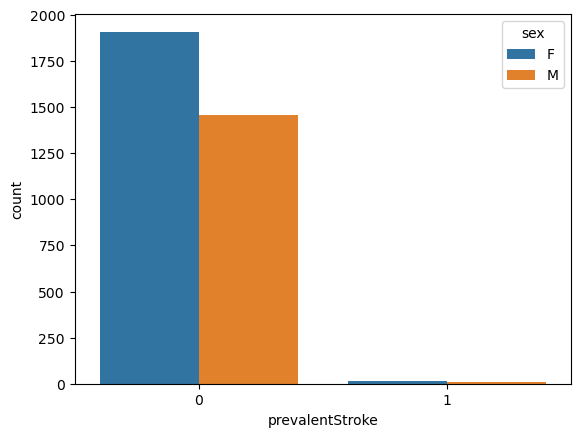

In [27]:
sn.countplot( x='prevalentStroke',data = data,hue='sex')

In [28]:
data['test'] = (data['age'] > 60)
data['test'].sum()

462

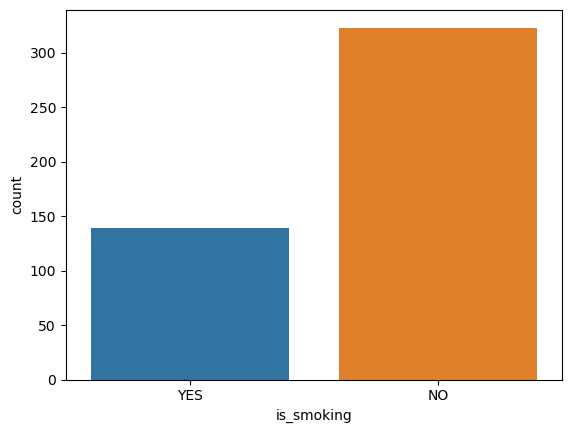

In [29]:
datas=data[data["age"]>60]
sn.countplot(datas.is_smoking)
plt.show()

# aged people smoke less  and most of them they din't smoke (age>=60 or 60+)

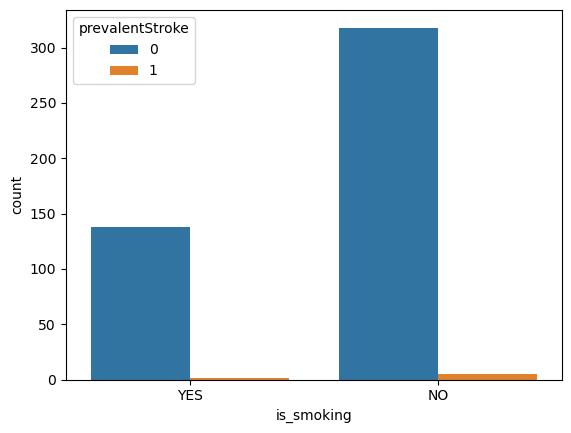

In [30]:
datas=data[data["age"]>60]
sn.countplot(data=datas , x='is_smoking',hue='prevalentStroke')
plt.show()

## And the aged people those who din't smoke they gets more prevalent stroke as compare to those who smoke .

## Which age people smoke more ?

<Figure size 1200x900 with 0 Axes>

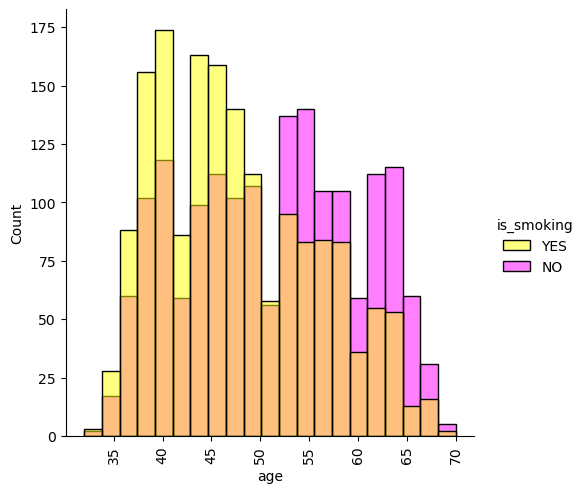

In [31]:
plt.figure(figsize=(12,9))
sn.displot(x="age",data=data,hue="is_smoking",palette=['#ffff00','#ff00ff'])
plt.xticks(rotation=90)
plt.show()

### With the increase in age (means 40+)the percentage of smoker  decreases and from 28 to 40 it increases rapidly(means people smoke more at this stage ).
##At the age of 40 smoking  is at its peak.
 

### Those who smoke they got stroke or not?

<AxesSubplot:xlabel='is_smoking', ylabel='prevalentStroke'>

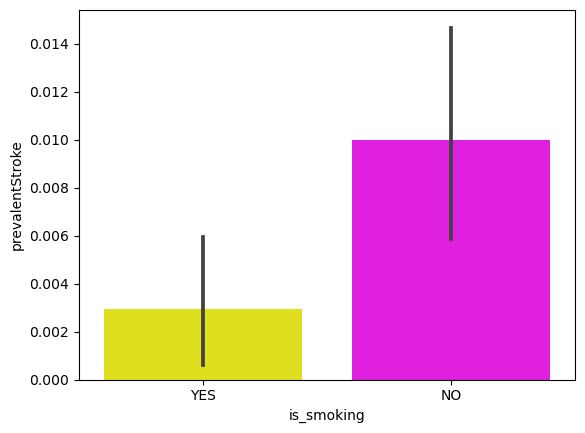

In [32]:
sn. barplot(data["is_smoking"], data["prevalentStroke"],palette=['#ffff00','#ff00ff'])

#### Therefore from above graph i conclude that somking is not correlated  with stroke or pevelent -stroke which means that if i they  dose not smoke  there is a chance to get stroke  .

## who are having more chances to get infected with CHD male or female ? 

<AxesSubplot:xlabel='sex', ylabel='TenYearCHD'>

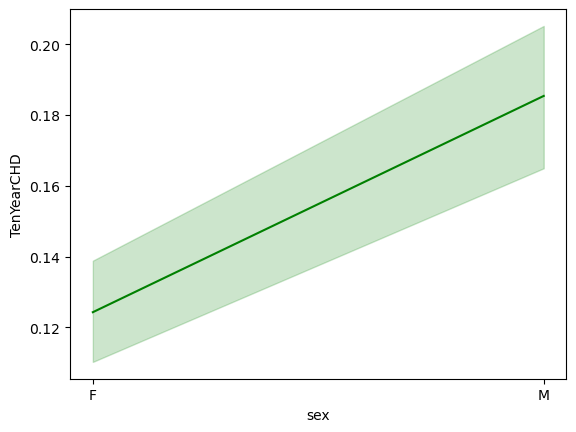

In [33]:
sn.lineplot(data["sex"],data['TenYearCHD'],color='green') 

### from above i conclude that there is more  risk to  male  to get  CHD (10 year risk of coronary heart disease CHD)as compared to female .

<AxesSubplot:xlabel='prevalentStroke', ylabel='Density'>

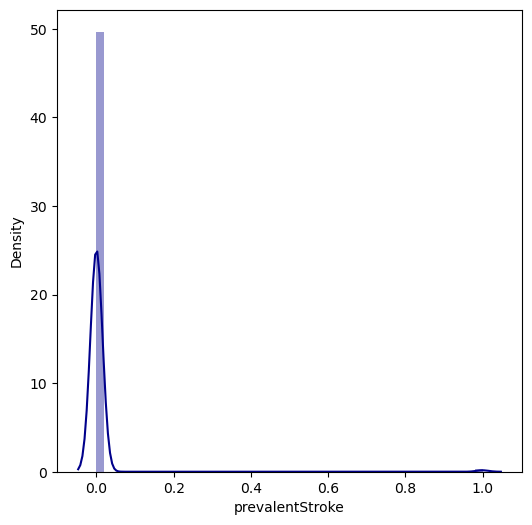

In [34]:
plt.figure(figsize=(6,6))
sn.distplot(data["prevalentStroke"],color='darkBlue') 

## percentage of male and female ?

In [35]:
for i in data['sex']:
    print(i)

F
M
F
M
F
F
M
M
F
F
F
F
F
M
F
M
F
F
F
M
F
F
F
F
F
M
M
M
M
F
M
M
F
M
M
F
F
F
F
M
F
M
M
F
F
F
F
F
F
F
M
M
F
M
M
F
F
F
F
F
F
M
F
F
M
F
M
M
F
M
M
M
F
F
M
F
M
F
M
M
M
M
M
F
F
M
M
M
M
M
M
F
F
M
F
F
F
M
M
M
F
M
F
M
F
F
F
M
M
F
F
F
F
M
F
F
F
M
M
F
F
M
F
F
F
F
M
M
F
M
M
M
F
M
F
F
F
M
F
F
F
M
F
F
F
M
F
M
M
M
F
M
F
F
M
M
F
M
M
F
M
F
F
F
M
F
F
M
F
F
F
F
M
F
F
F
F
M
M
M
F
F
F
F
F
M
M
M
F
F
F
M
M
F
F
M
F
F
F
F
M
F
M
F
F
F
F
F
M
F
F
F
M
F
F
M
F
M
M
M
M
F
F
F
F
M
F
M
M
F
M
M
F
F
F
F
F
M
F
M
F
M
F
M
M
F
F
F
M
F
M
F
F
M
F
F
F
M
F
F
F
M
M
M
F
F
F
M
M
M
F
F
F
F
F
F
F
M
F
F
M
M
M
F
F
M
F
F
M
F
F
M
F
F
F
M
M
F
M
M
M
F
M
F
F
M
M
F
F
F
F
M
F
F
F
F
F
M
M
M
M
M
F
M
F
F
F
F
F
F
M
F
F
F
M
F
M
F
F
F
M
F
F
M
M
M
M
M
F
F
M
M
M
F
F
F
F
F
F
F
M
M
M
F
M
F
M
F
F
F
F
M
F
M
M
F
M
M
M
M
M
F
F
F
M
F
F
M
M
F
F
F
M
F
F
F
F
F
M
M
F
M
F
F
M
M
F
F
M
M
F
F
F
M
F
F
M
F
F
F
F
F
F
F
F
M
F
M
M
M
M
M
F
M
F
M
F
F
M
M
M
M
M
F
F
F
F
M
M
F
M
M
F
M
M
M
M
F
F
M
M
F
F
F
M
F
M
M
M
M
M
F
F
F
F
M
F
M
F
F
M
F
M
M
F
F
F
M
M
F
F
F
F
M
F
F
M
F
F
F


In [36]:
for i in data['sex']:
    if i == 'M':
        print(0)
    else:
        print(1)

1
0
1
0
1
1
0
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
1
1
1
0
0
0
0
1
0
0
1
0
0
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
1
1
0
0
0
1
0
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
1
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
0
1
1
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
1
0
1
0
0
1
0
0
1
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
0
1
0
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
1
1
0
0
0
0
0
1
1
0
0
0
1
1
1
1
1
1
1
0
0
0
1
0
1
0
1
1
1
1
0
1
0
0
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
1
1
0
1
1
1
1
1
0
0
1
0
1
1
0
0
1
1
0
0
1
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
0
1
1
1
1
0
1
0
1
1
0
1
0
0
1
1
1
0
0
1
1
1
1
0
1
1
0
1
1
1


In [37]:
males=0
females=0

In [38]:
for i in data['sex']:
    if i=='M':
        males+=1
        print(males)
    else:
        females+=1
        print(females)

1
1
2
2
3
4
3
4
5
6
7
8
9
5
10
6
11
12
13
7
14
15
16
17
18
8
9
10
11
19
12
13
20
14
15
21
22
23
24
16
25
17
18
26
27
28
29
30
31
32
19
20
33
21
22
34
35
36
37
38
39
23
40
41
24
42
25
26
43
27
28
29
44
45
30
46
31
47
32
33
34
35
36
48
49
37
38
39
40
41
42
50
51
43
52
53
54
44
45
46
55
47
56
48
57
58
59
49
50
60
61
62
63
51
64
65
66
52
53
67
68
54
69
70
71
72
55
56
73
57
58
59
74
60
75
76
77
61
78
79
80
62
81
82
83
63
84
64
65
66
85
67
86
87
68
69
88
70
71
89
72
90
91
92
73
93
94
74
95
96
97
98
75
99
100
101
102
76
77
78
103
104
105
106
107
79
80
81
108
109
110
82
83
111
112
84
113
114
115
116
85
117
86
118
119
120
121
122
87
123
124
125
88
126
127
89
128
90
91
92
93
129
130
131
132
94
133
95
96
134
97
98
135
136
137
138
139
99
140
100
141
101
142
102
103
143
144
145
104
146
105
147
148
106
149
150
151
107
152
153
154
108
109
110
155
156
157
111
112
113
158
159
160
161
162
163
164
114
165
166
115
116
117
167
168
118
169
170
119
171
172
120
173
174
175
121
122
176
123
124
125
177
126
178


In [39]:
total=males+females
data_gender=[males/total*100,females/total*100]

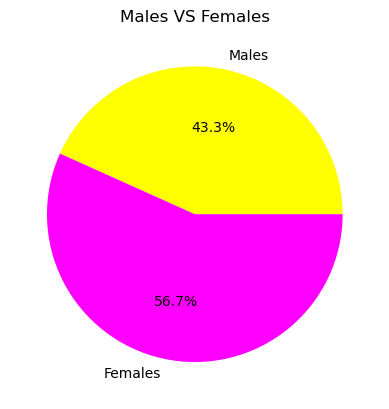

In [40]:
label=['Males','Females']
colors = ['#ffff00','#ff00ff']
plt.pie(x=data_gender,labels=label,colors=colors,autopct="%1.1f%%")
plt.title("Males VS Females")
plt.show()

### female percentage are more as compare to female.

<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

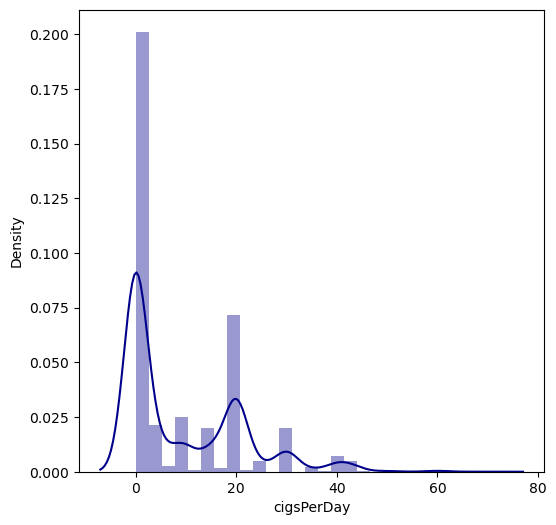

In [41]:
plt.figure(figsize=(6,6))
sn.distplot(data["cigsPerDay"],color='darkBlue') 

## Those who smoke they got stroke or not

<AxesSubplot:ylabel='prevalentStroke'>

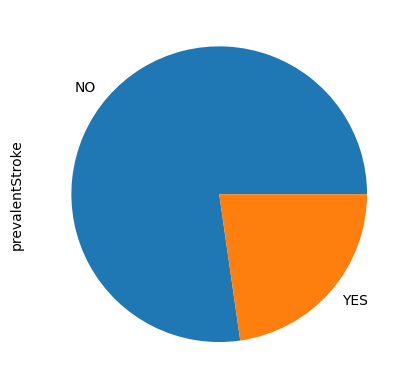

In [42]:
colors = ['#ffff00','#ff00ff']
data.groupby("is_smoking")["prevalentStroke"].sum().plot.pie()

##### therefore from above graph i conclude that somking is not correlated  with stroke or pevelent -stroke which means that if i they  dose not smoke  there is a chance to get stroke  

<AxesSubplot:xlabel='is_smoking', ylabel='count'>

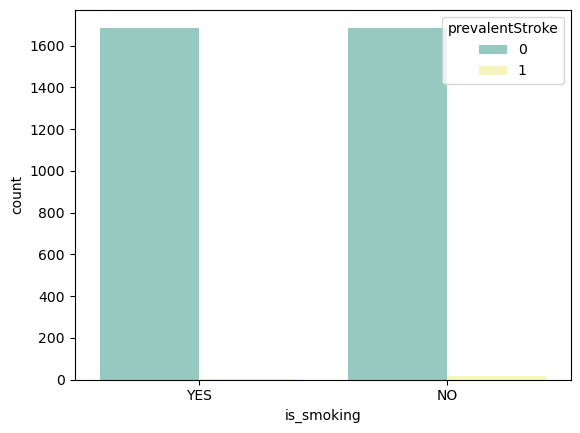

In [43]:
sn.countplot(data=data,x='is_smoking',hue="prevalentStroke", palette ='Set3')

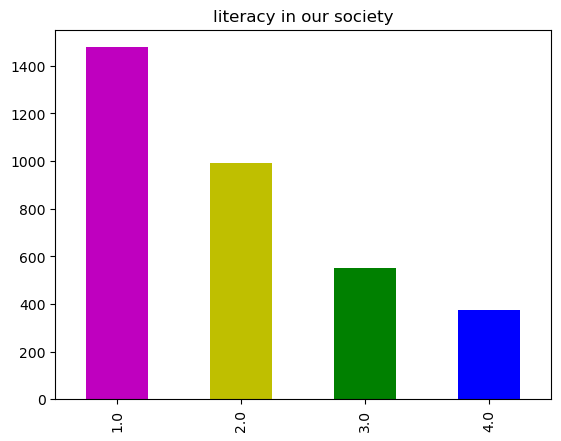

In [44]:
data.education.value_counts().plot.bar(color=["m","y","g","b"])
plt.title("literacy in our society")
plt.show()

#### from above i can conclude that very less people are educated 

<AxesSubplot:xlabel='is_smoking', ylabel='count'>

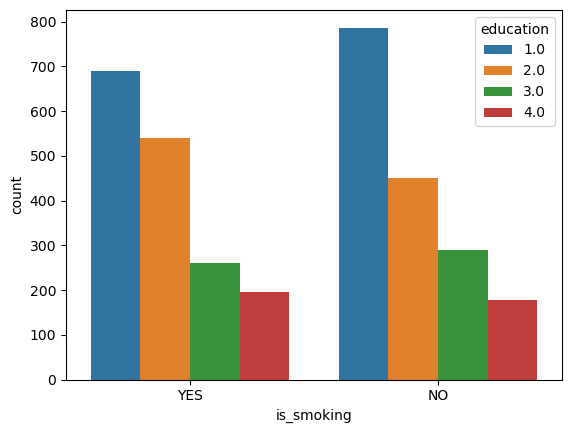

In [45]:
sn.countplot(data=data,x="is_smoking",hue="education")

## i can conclude that the people who are not educates(illetrate ) they smoke more as compare to educated peploe

<AxesSubplot:xlabel='prevalentStroke', ylabel='count'>

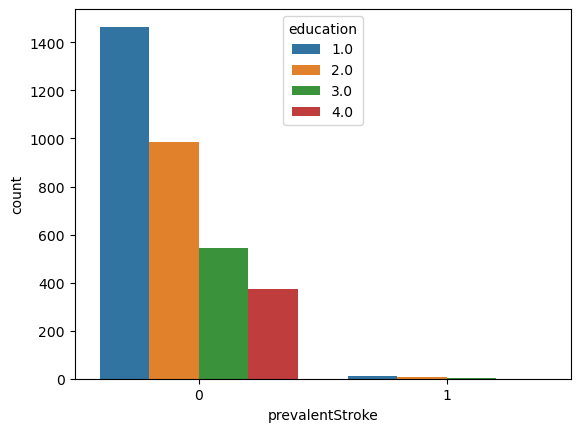

In [46]:
sn.countplot(data=data,x="prevalentStroke",hue="education")

<AxesSubplot:ylabel='diabetes'>

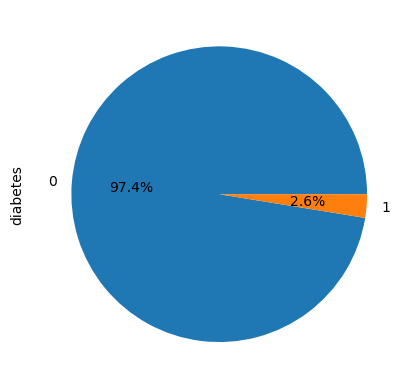

In [47]:
data.diabetes.value_counts().plot.pie(autopct="%1.1f%%")

from pie chart we can conclude that very less people have diabeetes 

### The good news is, people with any type of diabetes, who maintain good control over their blood sugar, cholesterol, and blood pressure, have a lower risk of kidney disease, eye disease, nervous system problems, heart attack, and stroke, and can live, a long and healthy life.

<AxesSubplot:xlabel='age', ylabel='Density'>

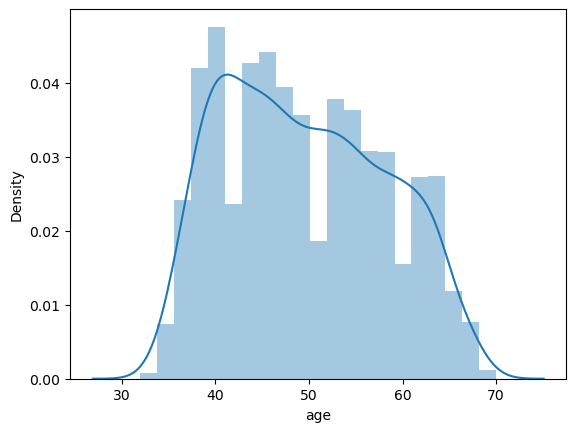

In [48]:
sn.distplot(data.age)

## The graph is not normally distributed  which means (40 to 50 age people are more)

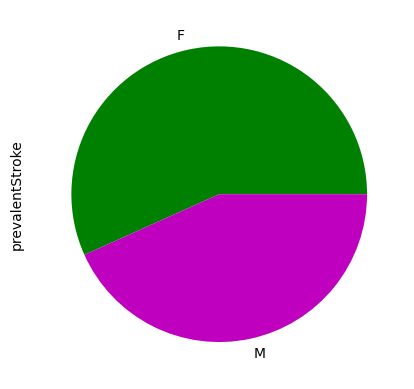

In [49]:
data.groupby("sex")["prevalentStroke"].count().plot.pie(colors=["g","m"])
plt.xticks(rotation=45,ha="right")
plt.show()

## from here we can conclude fmale gets more prevalentstroke as compare to male 


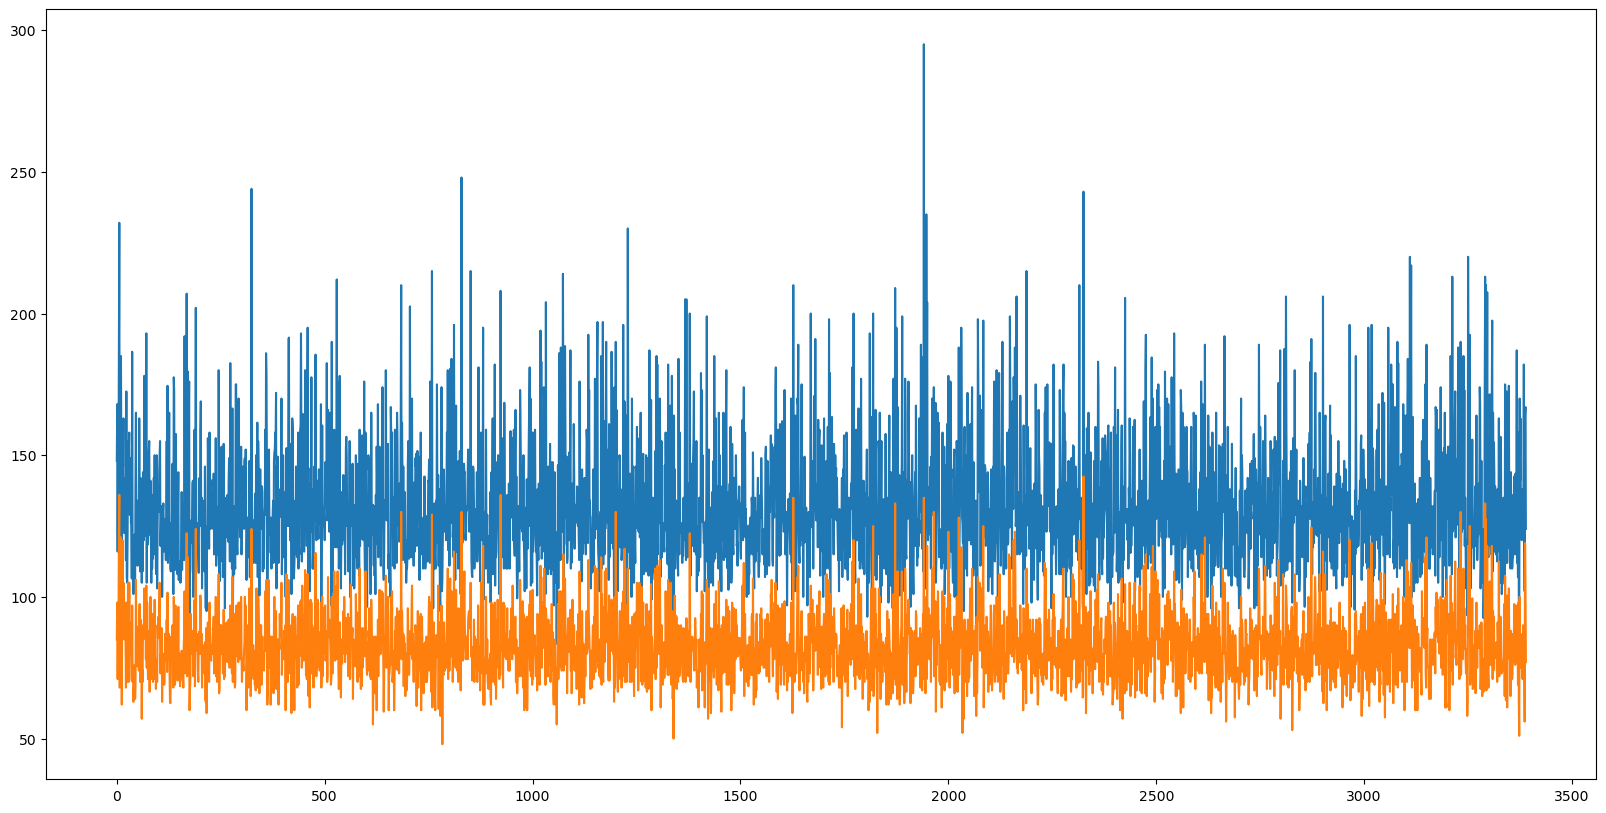

In [50]:
plt.figure(figsize=(20,10))
y1= data.sysBP
y2= data.diaBP
plt.plot(y1)
plt.plot(y2)
plt.show()    

## as from above stats i can conclude that very less people have normal blood pressure

### and most people high blood presure or low blood presure 

<Figure size 600x500 with 0 Axes>

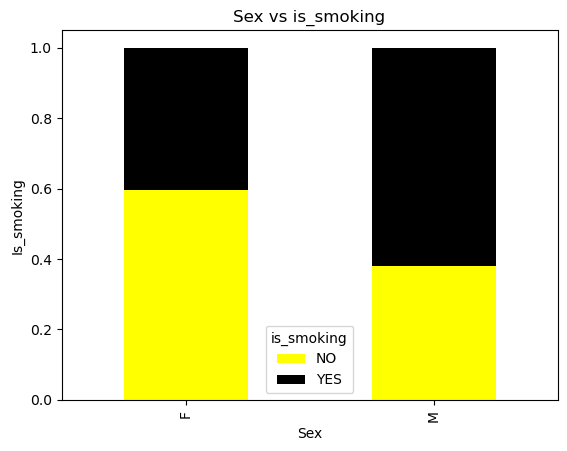

In [51]:
plt.figure(figsize=(6,5))
cross_tab_prop = pd.crosstab(index = data['sex'], columns = data['is_smoking'], normalize = "index")
cross_tab_prop.plot(kind='bar', stacked=True, colormap='gnuplot_r')
plt.title("Sex vs is_smoking")
plt.xlabel("Sex")
plt.ylabel("Is_smoking")
plt.show()

## we found that male smoke more as compare to female

Text(0.5, 0, 'heartRate')

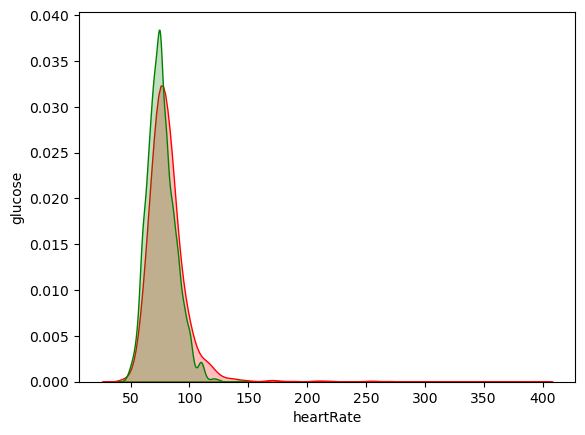

In [52]:
sn.kdeplot(data=data,x='glucose', color='r', shade=True)
sn.kdeplot(data=data, x='heartRate', color='g', shade=True) 
plt.ylabel('glucose')
plt.xlabel('heartRate')

## We found that resting heart rate was significantly higher in patients with higher fasting blood glucose levels compared with patients with normal glucose levels.

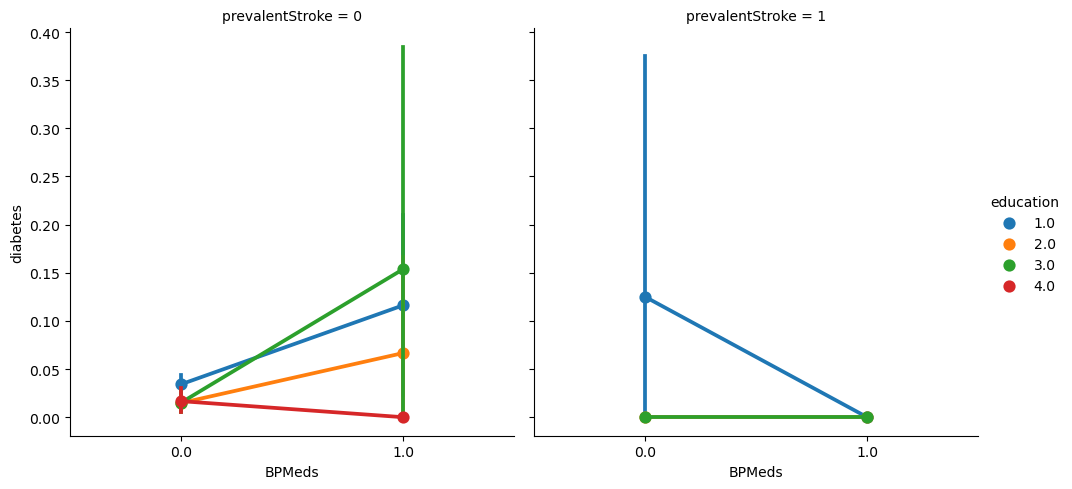

In [53]:
sn.factorplot("BPMeds","diabetes",hue="education",col="prevalentStroke",data=data)
plt.show()

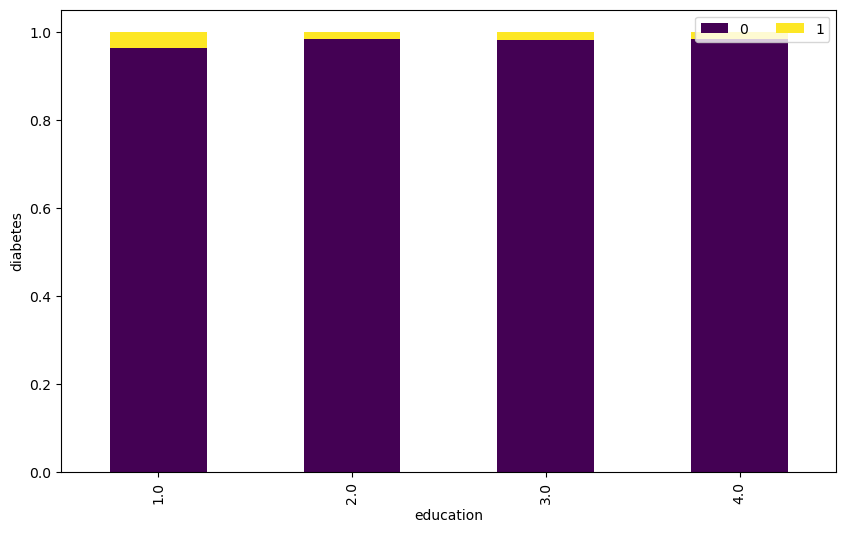

In [54]:
cross_tab_prop = pd.crosstab(index = data['education'], columns = data['diabetes'], normalize = "index")
cross_tab_prop.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.legend(loc="upper right", ncol=2)
plt.xlabel("education")
plt.ylabel("diabetes")
plt.show()

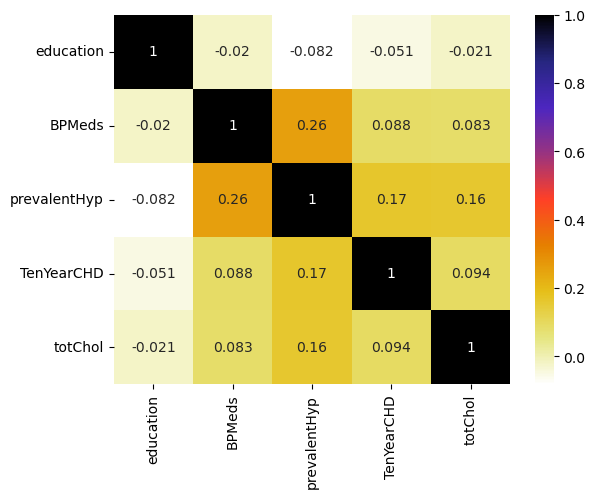

In [55]:
sn.heatmap(data[["education","BPMeds","prevalentHyp","TenYearCHD","totChol"]].corr(), annot=True, cmap="CMRmap_r")
plt.show()

<AxesSubplot:>

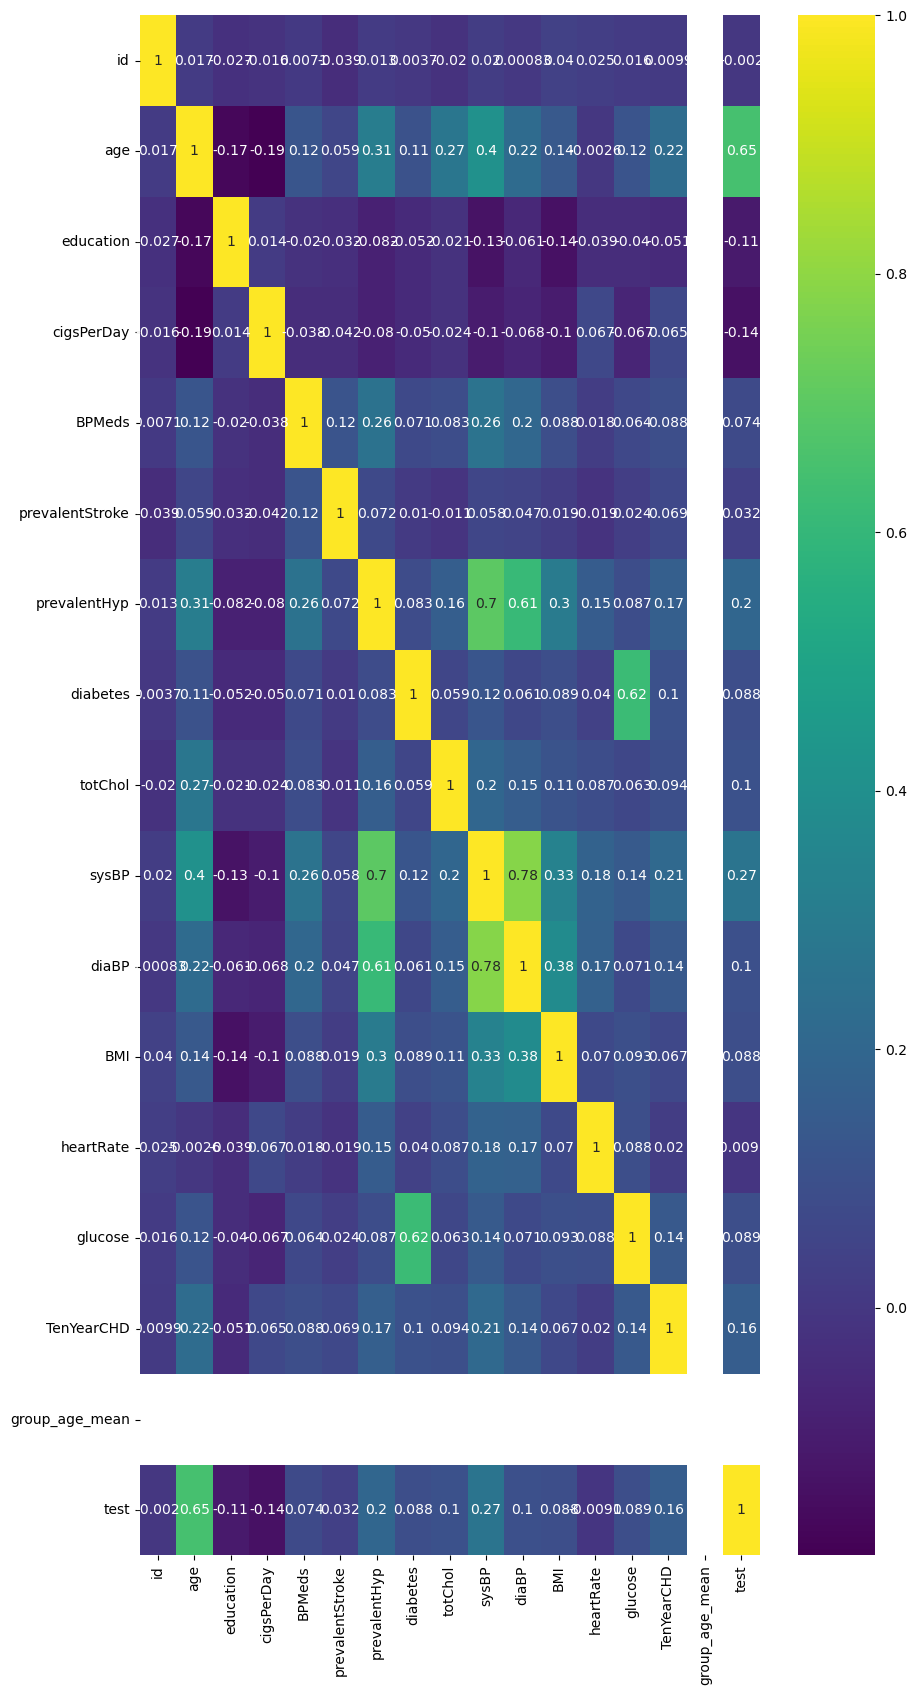

In [56]:
plt.figure(figsize=(10,20))
sn.heatmap(data.corr(),annot=True,cmap='viridis')

<Figure size 1200x900 with 0 Axes>

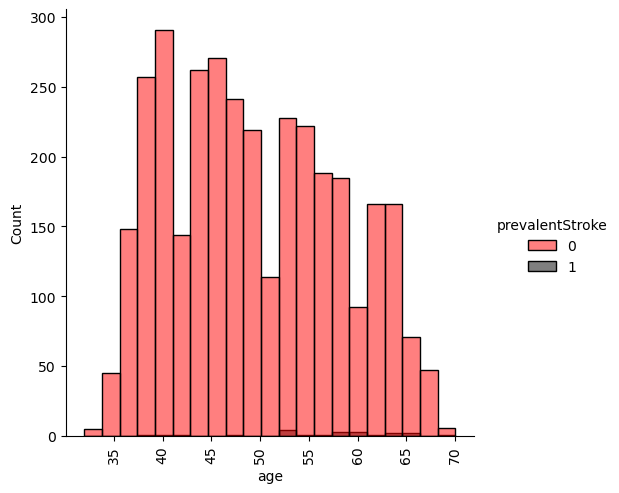

In [57]:
plt.figure(figsize=(12,9))
sn.displot(x="age",data=data,hue="prevalentStroke",palette=['#FF0000','#000000'])
plt.xticks(rotation=90)
plt.show()

# **People** **ages** **between** **53** **to** **65** **they** **got** **more** **number** **of** **prevalent** **stroke** **bold text**

## conclusion

## uneducated people(1) are likely to be more addicted to the ciagratte or smoking, and same for prevalent stroke and diabetes.
## from above stats i can conclude that fEmale gets more prevalent stroke as compare to male.
## With the increase in age (means 40+)the percentage of smoker  decreases and from 28 to 40 it increases rapidly(means people smoke more at this stage ).
## At the age of 40 smoking  is at its peak.
## And the aged people those who didn't smoke they get more prevalent stroke as compared to those who smokes .
# And the most intesting fact is that smoking no where is correlated with prevent stroke 
# There is more  risk to  male  to get  CHD (10 year risk of coronary heart disease CHD)as compared to female .

# Data Splitting

dealing with the categorical variable using labelencoding

In [58]:
cat_col=data[["sex",'is_smoking','test']]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,group_age,group_age_mean,test
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1,61-70,20.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,31-40,20.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,41-50,20.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,41-50,20.0,0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,61-70,20.0,1


In [59]:
data= data.dropna()
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,group_age,group_age_mean,test
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,31-40,20.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,41-50,20.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,41-50,20.0,0
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,61-70,20.0,1
5,5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,61-70,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0,61-70,20.0,1
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,51-60,20.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,41-50,20.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,41-50,20.0,0


In [61]:
X=data[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose']].copy()
y=data['TenYearCHD'].copy()

In [62]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2418, 15)
(605, 15)


In [63]:
X_train

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
251,35,2.0,0,1,20.0,0.0,0,0,0,231.0,150.0,90.0,23.09,83.0,72.0
3102,60,1.0,1,1,20.0,0.0,0,1,0,174.0,164.0,113.0,18.64,65.0,93.0
1921,40,3.0,0,0,0.0,0.0,0,0,0,226.0,118.0,72.0,24.75,87.0,79.0
1038,58,1.0,0,1,2.0,0.0,0,0,0,271.0,146.0,92.0,23.07,75.0,83.0
2887,41,2.0,0,1,9.0,0.0,0,0,0,200.0,124.0,76.0,24.20,80.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,52,3.0,0,1,20.0,0.0,0,0,0,215.0,132.0,82.0,25.11,71.0,75.0
927,63,3.0,0,0,0.0,0.0,0,1,0,315.0,156.0,90.0,25.92,64.0,74.0
1850,59,1.0,0,0,0.0,0.0,0,0,0,276.0,127.5,85.5,22.91,78.0,60.0
2931,63,4.0,1,1,43.0,0.0,0,0,0,217.0,110.0,68.0,21.99,72.0,68.0


In [64]:
y_train.value_counts()

0    2051
1     367
Name: TenYearCHD, dtype: int64

In [65]:
y_test.value_counts()

0    514
1     91
Name: TenYearCHD, dtype: int64

## **Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [67]:
# Get the model coefficients
clf.coef_

array([[ 0.06595625, -0.07088568,  0.54623097,  0.2681602 ,  0.01620791,
         0.10619556,  0.50198467,  0.02484681, -0.19425844,  0.00330941,
         0.01659518, -0.00504371,  0.01702828, -0.00377779,  0.00767004]])

In [68]:
clf.intercept_

array([-9.00623853])

In [69]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [71]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8535980148883374
The accuracy on test data is  0.8545454545454545


[[2041   10]
 [ 344   23]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

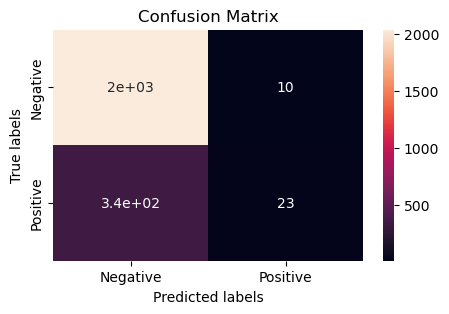

In [72]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(5,3))
labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[507   7]
 [ 81  10]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

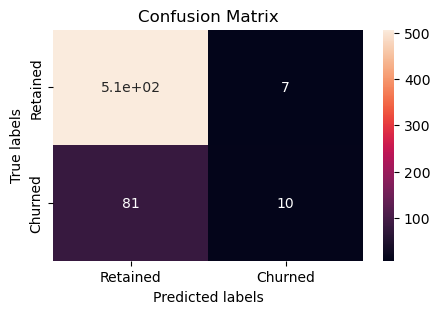

In [73]:
# Get the confusion matrix for both train and test
plt.figure(figsize=(5,3))
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [74]:
y_lr_predict_pro=clf.predict_proba(X_test)[:,1]

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_pro)

In [76]:
roc_auc_score(y_test,y_lr_predict_pro)

0.7478299910206525

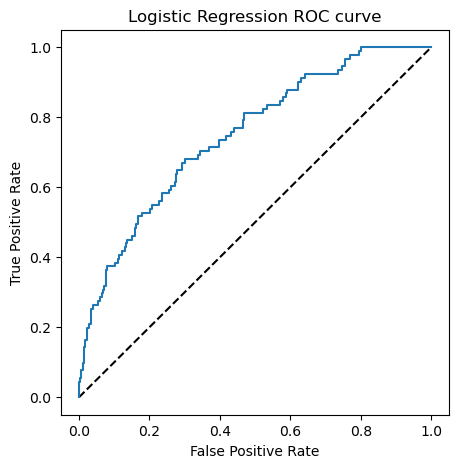

In [77]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()


## Handling Data Imbalalance

In [78]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [79]:
import imblearn

In [80]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
# X_sm, y_sm = smote.fit(X,y)

In [81]:
y_sm=pd.DataFrame(y_sm)

In [82]:
y_sm.value_counts()

TenYearCHD
0             2565
1             2565
dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split( X_sm,y_sm , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4104, 15)
(1026, 15)


In [84]:
y_train.value_counts()

TenYearCHD
1             2060
0             2044
dtype: int64

In [85]:
y_test.value_counts()

TenYearCHD
0             521
1             505
dtype: int64

In [86]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [87]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [88]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6920077972709552
The accuracy on test data is  0.682261208576998


In [89]:
# Get the confusion matrix for both train and test

cm = confusion_matrix(y_train, train_class_preds)
print('Confusion Matrix for training Data')
print(cm)
cm = confusion_matrix(y_test, test_class_preds)
print('Confusion Matrix for Test Data')
print(cm)

Confusion Matrix for training Data
[[1382  662]
 [ 602 1458]]
Confusion Matrix for Test Data
[[354 167]
 [159 346]]


In [90]:
y_lr_predict_pro=clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_lr_predict_pro)

In [91]:
roc_auc_score(y_test,y_lr_predict_pro)

0.7366184603105226

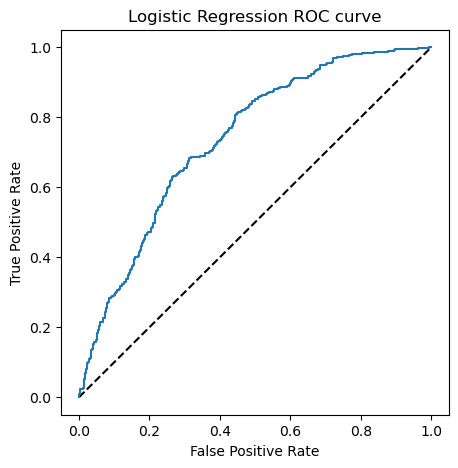

In [92]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()


## Random Forest

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 65, 80, 95,120], 'max_depth':[3, 5, 7,9,12]}
GSclassifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
GSclassifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'n_estimators': [50, 65, 80, 95, 120]},
             scoring='roc_auc')

In [95]:
bestvalues=GSclassifier.best_params_
GSclassifier.best_params_

{'max_depth': 12, 'n_estimators': 95}

In [96]:
classifier = RandomForestClassifier(max_depth=bestvalues['max_depth'],n_estimators=bestvalues['n_estimators']) # For GBM, use GradientBoostingClassifier()

classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=95)

In [97]:
y_train_preds_rf =  classifier.predict(X_train)
y_test_preds_rf= classifier.predict(X_test)

In [98]:
# Obtain accuracy on train set
accuracy_score(y_train,y_train_preds_rf)

0.9878167641325536

In [99]:
# Obtain accuracy on test set
accuracy_score(y_test,y_test_preds_rf)

0.8752436647173489

In [100]:
y_rf_predict_pro=classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_rf_predict_pro)

In [101]:
roc_auc_score(y_test,y_rf_predict_pro)

0.9553486250736398

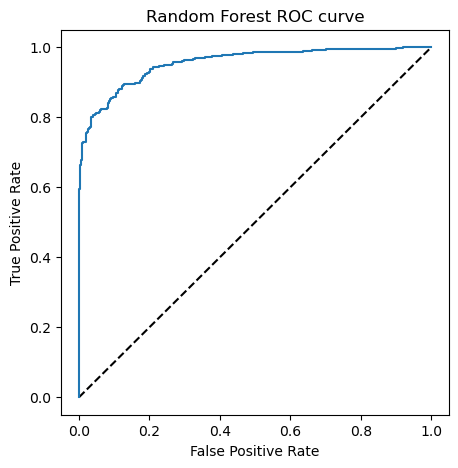

In [102]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [103]:
features = X.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

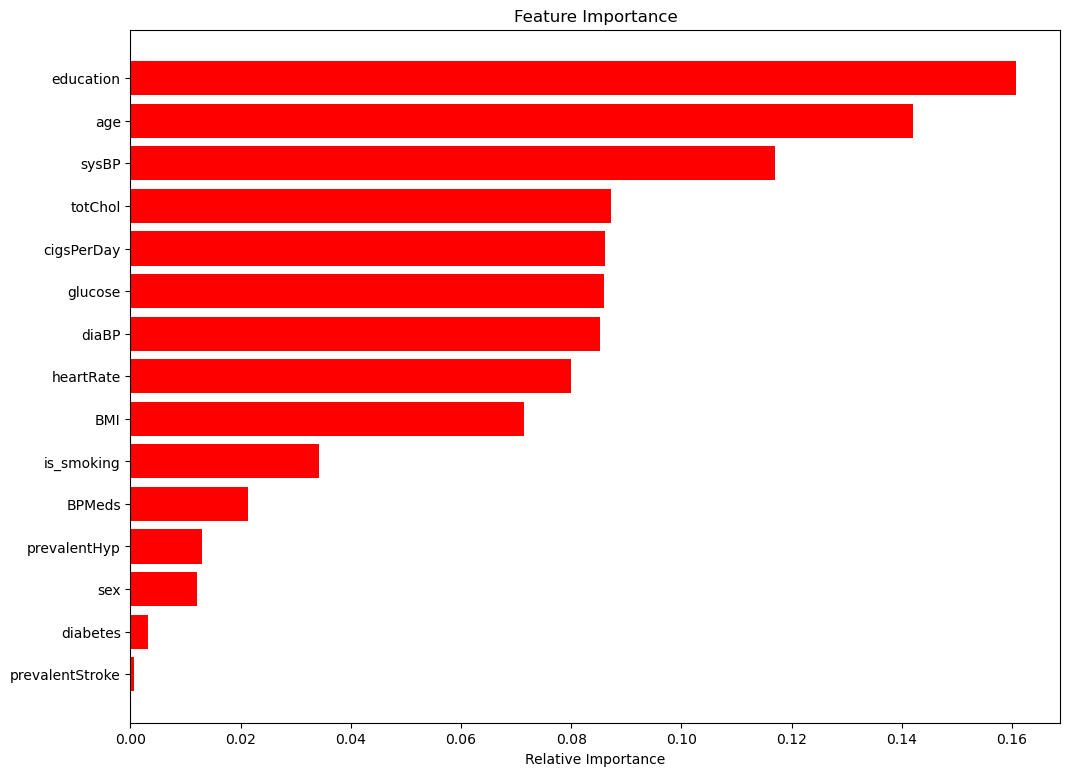

In [104]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## KNN

In [105]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [106]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_sm,y_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [107]:
bestPermet=knn_cv.best_params_
knn_cv.best_params_

{'n_neighbors': 2}

In [108]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

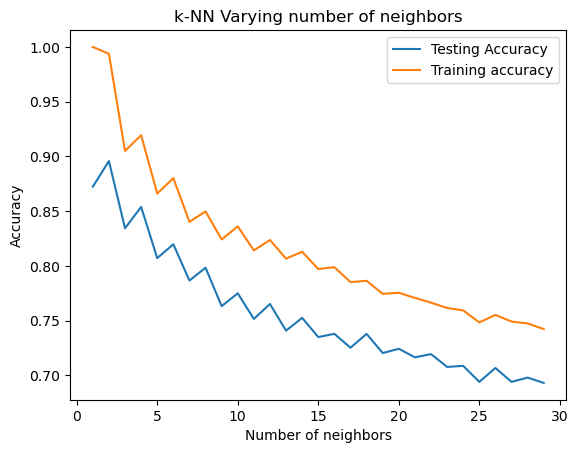

In [109]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [110]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=bestPermet['n_neighbors'])

In [111]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [112]:
knn.score(X_test,y_test)

0.8957115009746589

In [113]:
y_test_pred_knn = knn.predict(X_test)

In [114]:
confusion_matrix(y_test,y_test_pred_knn)

array([[438,  83],
       [ 24, 481]], dtype=int64)

In [115]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [117]:
roc_auc_score(y_test,y_pred_proba)

0.9076661408943197

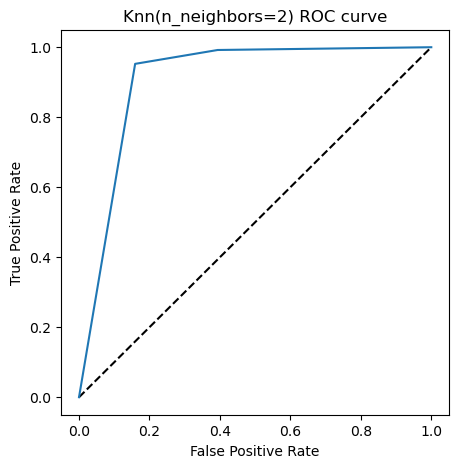

In [118]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

## SVM

In [119]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round(svc_classifier.score(X_test, y_test),2))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

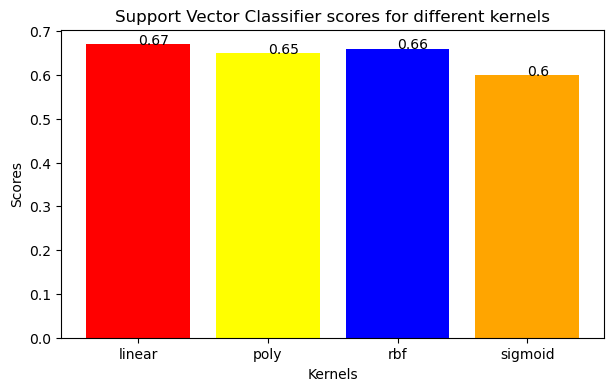

In [120]:
# colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores,color=['red', 'yellow', 'blue', 'orange'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [121]:
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [122]:
svm.score(X_test,y_test)

0.6559454191033138

In [123]:
y_svm_predi=svm.predict(X_test)


In [124]:
confusion_matrix(y_test,y_svm_predi)

array([[325, 196],
       [157, 348]], dtype=int64)

In [125]:
y_svm_predict_pro=svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_svm_predict_pro)

In [126]:
roc_auc_score(y_test,y_svm_predict_pro)

0.7070067083483781

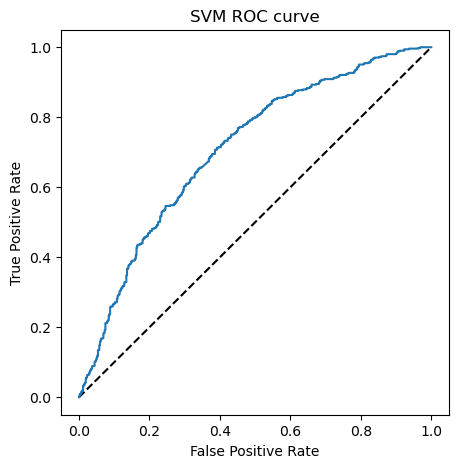

In [127]:
plt.figure(figsize=(5,5))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.show()

Support Vector Classifier accuracy: 65.59454191033139%
Logistic Regression accuracy: 61.79337231968811%
K Nearest Neighbors Classifier accuracy: 80.7017543859649%
Random Forest Classifier accuracy: 90.64327485380117%


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

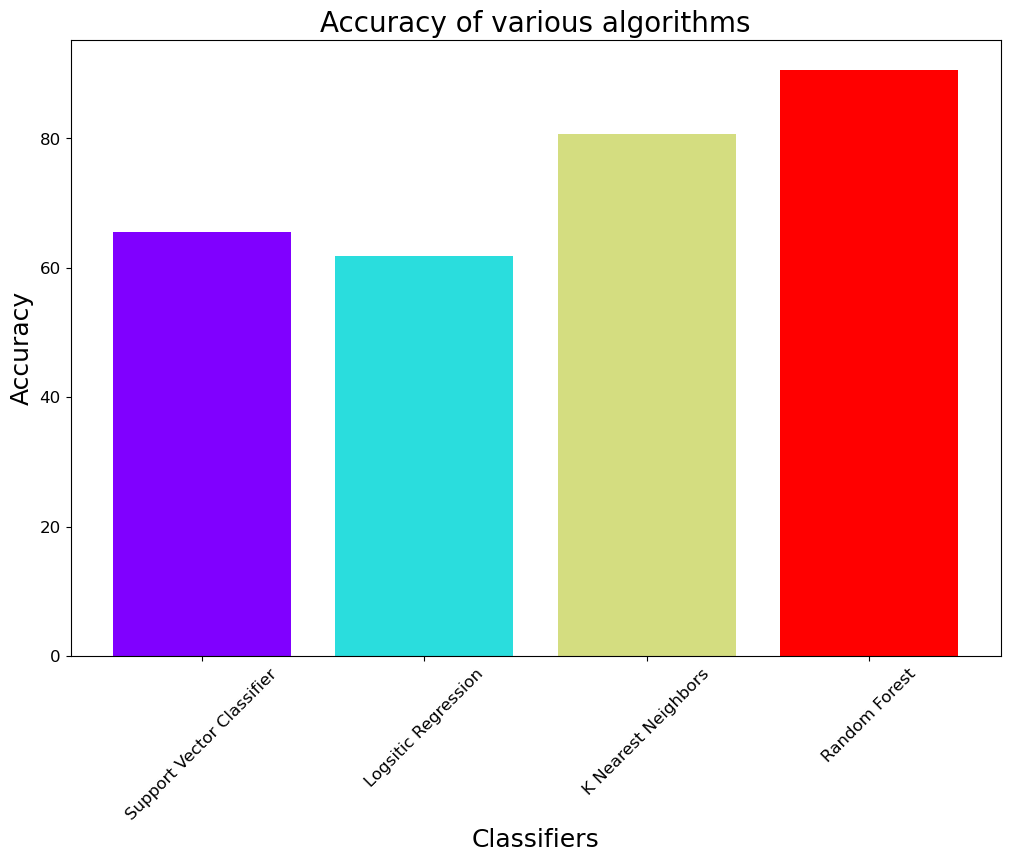

In [131]:
import matplotlib
import matplotlib.cm as cm
accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)